# TF Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

import tensorflow as tf

sns.set_style('whitegrid')

In [2]:
x_data = np.linspace(0, 10, 1000000)
noise = np.random.randn(len(x_data))

y = mx + b

b = 5

In [3]:
y_true = 0.5 * x_data + 5 + noise

In [4]:
x_df = pd.DataFrame(x_data, columns=['X_data'])
y_df = pd.DataFrame(y_true, columns=['Y'])

In [5]:
my_data = pd.concat([x_df, y_df], axis=1)

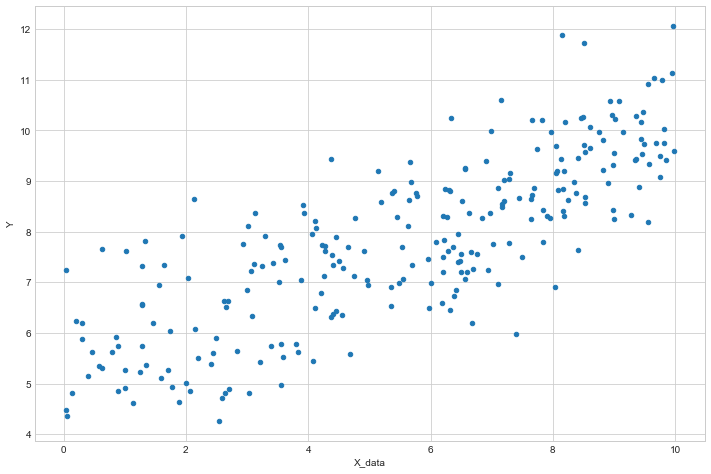

In [6]:
my_data.sample(250).plot(kind='scatter', x='X_data', y='Y', figsize=(12, 8));

In [7]:
batch_size = 8

In [8]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [9]:
x = tf.placeholder(tf.float32, [batch_size])
y = tf.placeholder(tf.float32, [batch_size])

In [10]:
y_hat = m * x + b

In [11]:
error = tf.reduce_sum((y - y_hat)**2)

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [13]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {
            x: x_data[rand_ind],
            y: y_true[rand_ind]
        }
        
        sess.run(train, feed_dict = feed)
    
    model_m, model_b = sess.run([m, b])

In [15]:
model_m, model_b

(0.53178227, 5.0098968)

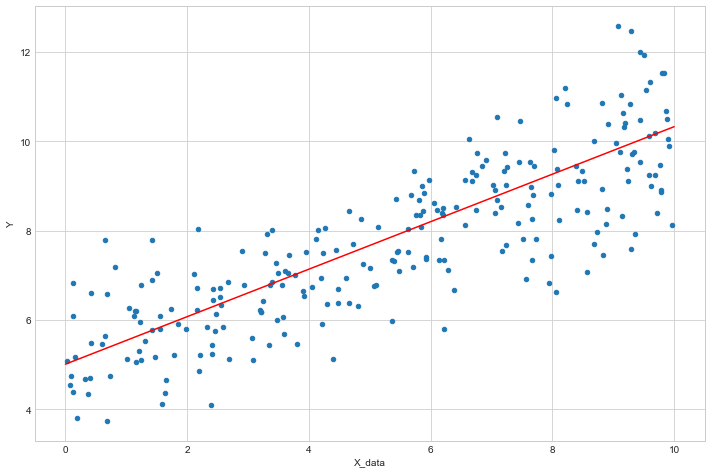

In [16]:
my_data.sample(250).plot(kind='scatter', x='X_data', y='Y', figsize=(12, 8));
plt.plot(x_data, x_data*model_m + model_b, 'r')

# TF Estimator

In [17]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [18]:
feat_cols

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [19]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Ujjwal\\AppData\\Local\\Temp\\tmpbun8dit3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017F00034828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3)

In [27]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [28]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [29]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [30]:
estimator.train(input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Ujjwal\AppData\Local\Temp\tmpbun8dit3\model.ckpt.
INFO:tensorflow:loss = 440.78662, step = 0
INFO:tensorflow:global_step/sec: 435.081
INFO:tensorflow:loss = 32.968994, step = 100 (0.230 sec)
INFO:tensorflow:global_step/sec: 520.81
INFO:tensorflow:loss = 22.950829, step = 200 (0.194 sec)
INFO:tensorflow:global_step/sec: 479.305
INFO:tensorflow:loss = 20.064873, step = 300 (0.212 sec)
INFO:tensorflow:global_step/sec: 487.622
INFO:tensorflow:loss = 2.3350015, step = 400 (0.200 sec)
INFO:tensorflow:global_step/sec: 523.497
INFO:tensorflow:loss = 6.3950114, step = 500 (0.194 sec)
INFO:tensorflow:global_step/sec: 510.432
INFO:tensorflow:loss = 6.7290993, step = 600 (0.196 sec)
INFO:tensorflow:global_step/

In [31]:
train_metrics = estimator.evaluate(train_input_func, 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-13-12:08:44
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Ujjwal\AppData\Local\Temp\tmpbun8dit3\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-13-12:08:48
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0702262, global_step = 1000, loss = 8.56181


In [32]:
train_metrics

{'average_loss': 1.0702262, 'loss': 8.56181, 'global_step': 1000}

In [33]:
test_metrics = estimator.evaluate(test_input_func, 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-13-12:10:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Ujjwal\AppData\Local\Temp\tmpbun8dit3\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-13-12:10:39
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1003778, global_step = 1000, loss = 8.803022


In [34]:
print(train_metrics)
print(test_metrics)

{'average_loss': 1.0702262, 'loss': 8.56181, 'global_step': 1000}
{'average_loss': 1.1003778, 'loss': 8.803022, 'global_step': 1000}


In [35]:
new_data = np.linspace(0, 10, 10)

In [36]:
pred_input_func = tf.estimator.inputs.numpy_input_fn({'x':new_data}, shuffle=False)

In [38]:
list(estimator.predict(pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Ujjwal\AppData\Local\Temp\tmpbun8dit3\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4788733], dtype=float32)},
 {'predictions': array([5.129009], dtype=float32)},
 {'predictions': array([5.7791443], dtype=float32)},
 {'predictions': array([6.4292793], dtype=float32)},
 {'predictions': array([7.0794153], dtype=float32)},
 {'predictions': array([7.7295504], dtype=float32)},
 {'predictions': array([8.379685], dtype=float32)},
 {'predictions': array([9.029821], dtype=float32)},
 {'predictions': array([9.679956], dtype=float32)},
 {'predictions': array([10.330091], dtype=float32)}]

In [39]:
predictions = []

for pred in estimator.predict(pred_input_func):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Ujjwal\AppData\Local\Temp\tmpbun8dit3\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [40]:
predictions

[array([4.4788733], dtype=float32),
 array([5.129009], dtype=float32),
 array([5.7791443], dtype=float32),
 array([6.4292793], dtype=float32),
 array([7.0794153], dtype=float32),
 array([7.7295504], dtype=float32),
 array([8.379685], dtype=float32),
 array([9.029821], dtype=float32),
 array([9.679956], dtype=float32),
 array([10.330091], dtype=float32)]

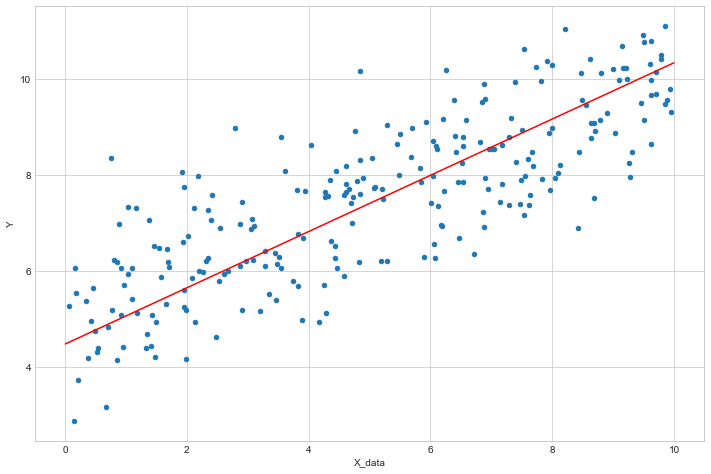

In [41]:
my_data.sample(250).plot(kind='scatter', x='X_data', y='Y', figsize=(12, 8));
plt.plot(new_data, predictions, 'r')